# VERZEO_MACHINE_LEARNING_MINI_PROJECT 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import csv
from sklearn import metrics

In [2]:
train_data=pd.read_csv('mobile_price_range_data.csv')
train_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


# 1.Remove the null values if present

In [4]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# 2.Split data into training and testing data

In [5]:
train_data_f = train_data[train_data['sc_w'] != 0]

In [6]:
x= train_data.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]].values  
y= train_data.iloc[:, 19].values
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title):
    cm=confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='BuPu')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

# 3.Apply the following models on the training dataset and generate the predicted value

# a) Logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [8]:
print('logistic regression prediction using mannual entered data',classifier.predict([[0,1,2.0,1,1,1,5,0.5,150,5,2,900,300,2500,10,11,12,1,1]]))
predict = pd.DataFrame(classifier.predict(x_test))
print(predict.head(),'\n')
actual_val = pd.DataFrame(y_test)
print(actual_val.head())

logistic regression prediction using mannual entered data [1]
   0
0  1
1  1
2  0
3  1
4  0 

   0
0  0
1  0
2  1
3  1
4  0


Logistic Regression Accuracy Score:  0.496
              precision    recall  f1-score   support

           0       0.51      0.44      0.47       257
           1       0.48      0.56      0.52       243

    accuracy                           0.50       500
   macro avg       0.50      0.50      0.49       500
weighted avg       0.50      0.50      0.49       500



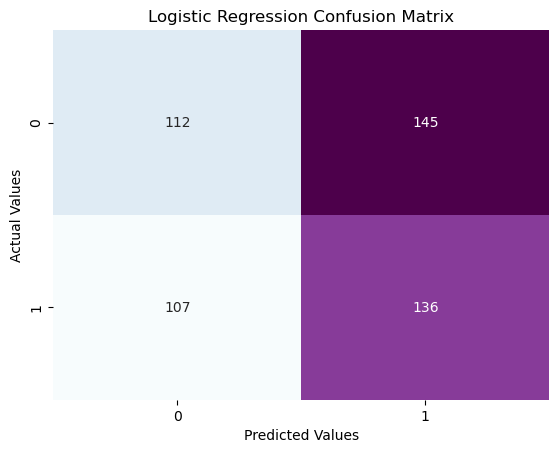

In [9]:
print('Logistic Regression Accuracy Score: ',accuracy_score(y_test,predict))
cm_rfc=my_confusion_matrix(y_test, predict, 'Logistic Regression Confusion Matrix')
#Visualization ( any visualization can be used)



# b)KNN classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,leaf_size=25)
knn.fit(x_train, y_train)

KNeighborsClassifier(leaf_size=25, n_neighbors=3)

In [11]:
print('KNN prediction using mannual entered data',classifier.predict([[0,1,2.0,1,1,1,5,0.5,150,5,2,900,300,2500,10,11,12,1,1]]))

y_pred_knn=knn.predict(x_test)
knnpred=pd.DataFrame(y_pred_knn)
print(knnpred.head())
actualknnpred=pd.DataFrame(y_test)
print(actualknnpred.head())

KNN prediction using mannual entered data [1]
   0
0  0
1  0
2  0
3  1
4  0
   0
0  0
1  0
2  1
3  1
4  0


KNN Classifier Accuracy Score:  0.48
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       257
           1       0.47      0.49      0.48       243

    accuracy                           0.48       500
   macro avg       0.48      0.48      0.48       500
weighted avg       0.48      0.48      0.48       500



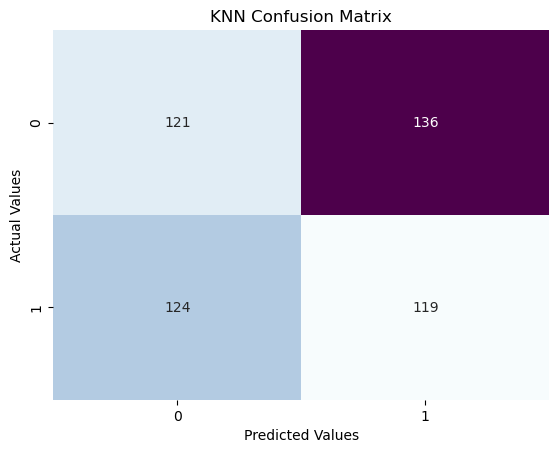

In [12]:
print('KNN Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
cm_rfc=my_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')

# c)SVM classifier with linear kernal = rbf

In [13]:
from sklearn import svm
svm_clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')
svm_clf.fit(x_train, y_train)

SVC(decision_function_shape='ovo')

In [14]:
y_pred_svm=pd.DataFrame(svm_clf.predict(x_test))
print('SVM prediction using mannual entered data',classifier.predict([[2500,1,3.0,1,1,1,5,0.5,150,5,2,900,300,2500,10,11,12,1,1]]))

y_pred_svm=svm_clf.predict(x_test)
svnpred=pd.DataFrame(y_pred_svm)
print(svnpred.head())
actualsvnpred=pd.DataFrame(y_test)
print(actualsvnpred.head())

SVM prediction using mannual entered data [1]
   0
0  0
1  0
2  0
3  1
4  1
   0
0  0
1  0
2  1
3  1
4  0


SVM Classifier Accuracy Score:  0.498
              precision    recall  f1-score   support

           0       0.51      0.42      0.46       257
           1       0.49      0.58      0.53       243

    accuracy                           0.50       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.50      0.50      0.49       500



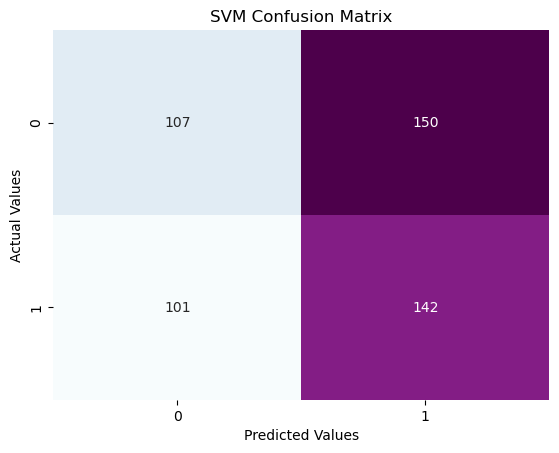

In [15]:
print('SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
cm_rfc=my_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')

# d)Decision Tree classifier 

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf = DecisionTreeClassifier()
clft = clf.fit(x_train,y_train)

In [18]:
y_pred_dtc = clft.predict(x_test)

print('DTC prediction using mannual entered data',classifier.predict([[2500,1,3.0,1,1,1,5,0.5,150,5,2,900,300,2500,10,11,12,1,1]]))

dtcpred=pd.DataFrame(y_pred_dtc)
print(dtcpred.head())
actualdtcpred=pd.DataFrame(y_test)
print(actualdtcpred.head())

DTC prediction using mannual entered data [1]
   0
0  0
1  1
2  0
3  0
4  0
   0
0  0
1  0
2  1
3  1
4  0


In [19]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dtc))

Accuracy: 0.504


DTC Accuracy Score:  0.504
              precision    recall  f1-score   support

           0       0.52      0.49      0.51       257
           1       0.49      0.51      0.50       243

    accuracy                           0.50       500
   macro avg       0.50      0.50      0.50       500
weighted avg       0.50      0.50      0.50       500



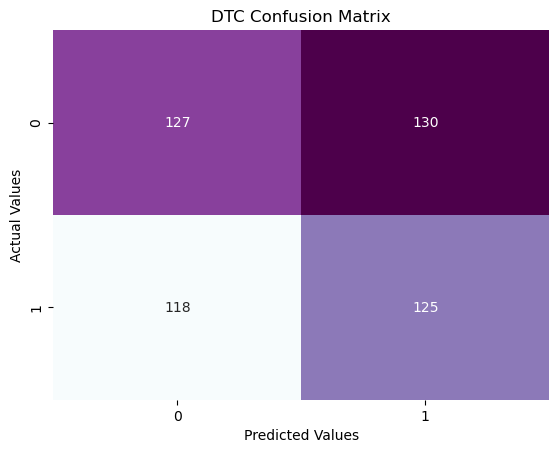

In [20]:
print('DTC Accuracy Score: ',accuracy_score(y_test,y_pred_dtc))
cm_rfc=my_confusion_matrix(y_test, y_pred_dtc, 'DTC Confusion Matrix')

# e) Random tree classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(bootstrap= True,
                           max_depth= 7,
                           max_features= 15,
                           min_samples_leaf= 3,
                           min_samples_split= 10,
                           n_estimators= 200,
                           random_state=7)

rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=7, max_features=15, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=200, random_state=7)

In [22]:
y_pred_rtc=rfc.predict(x_test)
print('RTC prediction using mannual entered data',classifier.predict([[2500,1,3.0,1,1,1,5,0.5,150,5,2,900,300,2500,10,11,12,1,1]]))

rtcpred=pd.DataFrame(y_pred_rtc)
print(rtcpred.head())
actualrtcpred=pd.DataFrame(y_test)
print(actualrtcpred.head())

RTC prediction using mannual entered data [1]
   0
0  0
1  1
2  0
3  1
4  0
   0
0  0
1  0
2  1
3  1
4  0


Random Forest Classifier Accuracy Score:  0.506
              precision    recall  f1-score   support

           0       0.53      0.37      0.44       257
           1       0.49      0.65      0.56       243

    accuracy                           0.51       500
   macro avg       0.51      0.51      0.50       500
weighted avg       0.51      0.51      0.50       500



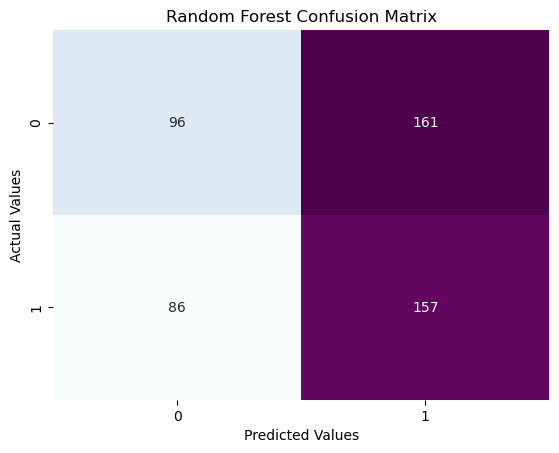

In [23]:
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_rtc))
cm_rfc=my_confusion_matrix(y_test, y_pred_rtc, 'Random Forest Confusion Matrix')

In [24]:
print('Logistic Regression Accuracy Score: ',accuracy_score(y_test,predict))
print('KNN Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_knn))
print('SVM Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_svm))
print('DTC Accuracy Score: ',accuracy_score(y_test,y_pred_dtc))
print('Random Forest Classifier Accuracy Score: ',accuracy_score(y_test,y_pred_rtc))

Logistic Regression Accuracy Score:  0.496
KNN Classifier Accuracy Score:  0.48
SVM Classifier Accuracy Score:  0.498
DTC Accuracy Score:  0.504
Random Forest Classifier Accuracy Score:  0.506


In [25]:
max(0.496,0.48,0.498,0.469,0.506)

0.506

# CONSLUSION : The Random Forest method's accuracy rate is more than the other methods
